In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')

/tmp/ipykernel_94724/3712370352.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')


In [59]:
# Find the categorical columns
categorical_cols = ['changeconfirmeddeliverydate', 'changecontract', 'changecurrency',
                                   'changedeliveryindicator', 'changefinalinvoiceindicator',
                                   'changeoutwarddeliveryindicator', 'changeprice', 'changequantity',
                                   'changerequesteddeliverydate', 'changestoragelocation',
                                   'BUKRS', 'MATKL', 'ESTKZ', 'BSART', 'LGORT',
                                   #'MATNR', 
                                   'PSTYP', 'WERKS', 'ERNAM', 'LIFNR', 'SHKZG']
numerical_cols = ['deliverydaysexpected', 'scheduledshipdays', 'approvaldays', 'NETPR',
                            'numdelivery']

# Random Forrest Feature Selection

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Transform and Clean gdata
gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')
gdata = gdata[categorical_cols + numerical_cols + ['lateGR']]
gdata = gdata.dropna(subset=['lateGR'])

# Assuming 'target' is the name of your target variable
X = gdata[categorical_cols + numerical_cols]
X = pd.get_dummies(X, columns=categorical_cols)
y = gdata['lateGR']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
regr = RandomForestRegressor(n_estimators=33, random_state=42)

# Fit the regressor with the training data
regr.fit(X_train, y_train)

# Predict on the test data
y_pred = regr.predict(X_test)

/tmp/ipykernel_106940/2932354679.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')


In [6]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R-squared:', adjusted_r2)

Mean Absolute Error: 0.0925079019201897
Root Mean Squared Error: 0.2202400268957186
R-squared: 0.8059669429750084
Adjusted R-squared: 0.7240341266692973


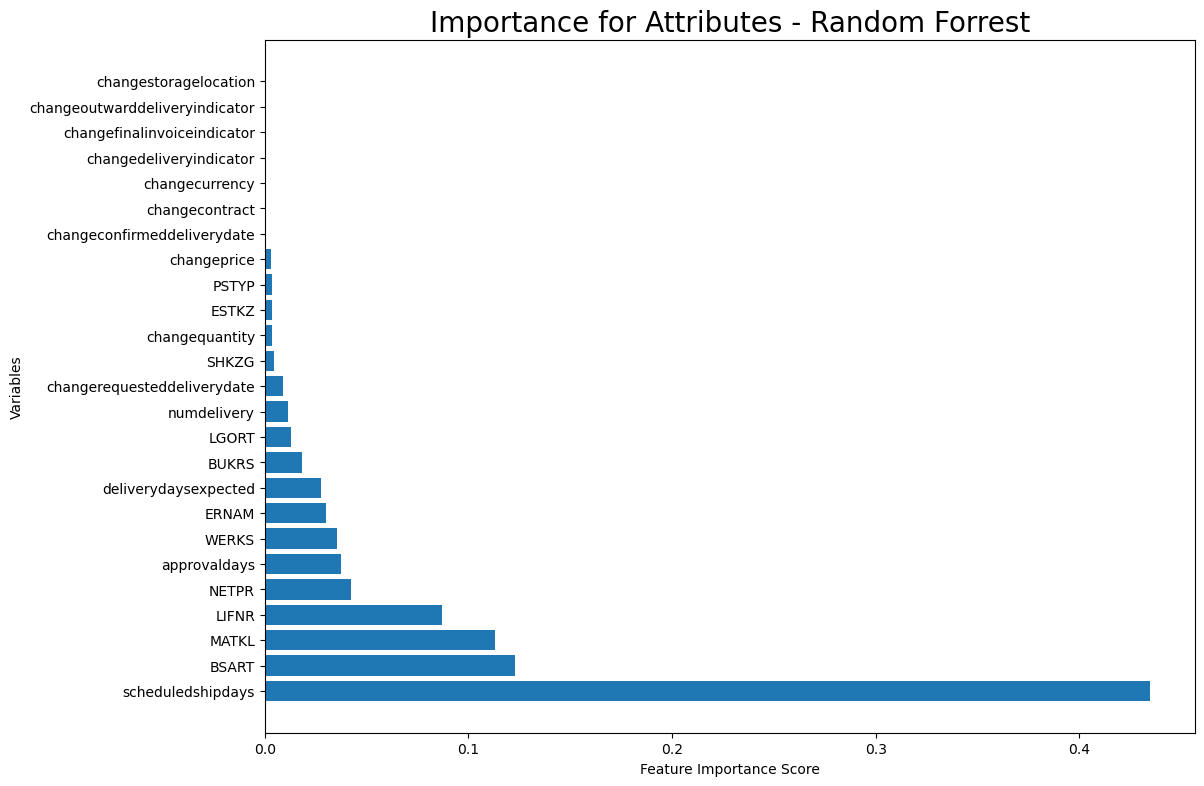

In [86]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importance = regr.feature_importances_

# Grouping feature importance by original categorical variables
categorical_importance = {}
for col in categorical_cols:
    categorical_importance[col] = sum(feature_importance[X.columns.str.startswith(col)])

# Adding continuous variables to the importance dictionary
continuous_importance = {}
for col in numerical_cols:
    categorical_importance[col] = feature_importance[X.columns.get_loc(col)]

# Sorting the importance dictionary by importance score
sorted_importance = dict(sorted(categorical_importance.items(), key=lambda item: item[1], reverse=True))

# Plotting the importance of all variables
plt.figure(figsize=(12, 9))
plt.barh(list(sorted_importance.keys()), list(sorted_importance.values()), align='center')
plt.xlabel('Feature Importance Score')
plt.ylabel('Variables')
plt.title('Importance for Attributes - Random Forrest', fontsize=20)
plt.show()

In [87]:
sorted_importance

{'scheduledshipdays': 0.43486092454107705,
 'BSART': 0.1229139641562667,
 'MATKL': 0.11301608930293988,
 'LIFNR': 0.08695607151157203,
 'NETPR': 0.04232055911087528,
 'approvaldays': 0.03733767055782647,
 'WERKS': 0.035513669397037484,
 'ERNAM': 0.029815188613053316,
 'deliverydaysexpected': 0.027441683217166293,
 'BUKRS': 0.01843812752361523,
 'LGORT': 0.012929472191889493,
 'numdelivery': 0.011317336335414667,
 'changerequesteddeliverydate': 0.009047508344325347,
 'SHKZG': 0.004604798617497145,
 'changequantity': 0.0035983502741017246,
 'ESTKZ': 0.003587168701206506,
 'PSTYP': 0.003307169885267279,
 'changeprice': 0.002994247718868114,
 'changeconfirmeddeliverydate': 0,
 'changecontract': 0,
 'changecurrency': 0,
 'changedeliveryindicator': 0,
 'changefinalinvoiceindicator': 0,
 'changeoutwarddeliveryindicator': 0,
 'changestoragelocation': 0}

In [9]:
print(list(sorted_importance.keys())[:18])

['scheduledshipdays', 'BSART', 'MATKL', 'LIFNR', 'NETPR', 'approvaldays', 'WERKS', 'ERNAM', 'deliverydaysexpected', 'BUKRS', 'LGORT', 'numdelivery', 'changerequesteddeliverydate', 'SHKZG', 'changequantity', 'changeprice', 'ESTKZ', 'PSTYP']


In [60]:
top_features = ['scheduledshipdays', 'BSART', 'MATKL', 'LIFNR', 'NETPR', 
                'approvaldays', 'WERKS', 'ERNAM', 'deliverydaysexpected', 
                'BUKRS', 'LGORT', 'numdelivery', 'changerequesteddeliverydate', 
                'SHKZG', 'changequantity', 'changeprice', 'ESTKZ', 'PSTYP']

# Random Forrest Analysis

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Transform and Clean gdata
gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')
gdata = gdata[top_features + ['lateGR']]
gdata = gdata.dropna(subset=['lateGR'])

# Assuming 'target' is the name of your target variable
X = gdata[top_features]
X = pd.get_dummies(X, columns=list(set(top_features) & set(categorical_cols)))
y = gdata['lateGR']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
regr = RandomForestRegressor(n_estimators=75, random_state=42)

# Fit the regressor with the training data
regr.fit(X_train, y_train)

# Predict on the test data
y_pred = regr.predict(X_test)

/tmp/ipykernel_94724/3564709623.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')


In [85]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calculate Accuracy 
accuracy = regr.score(X_test, y_test)
print('Accuracy:', accuracy)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Accuracy: 0.807680564591877
Mean Absolute Error: 0.09265529624309478
Root Mean Squared Error: 0.2192653346042576
R-squared: 0.807680564591877


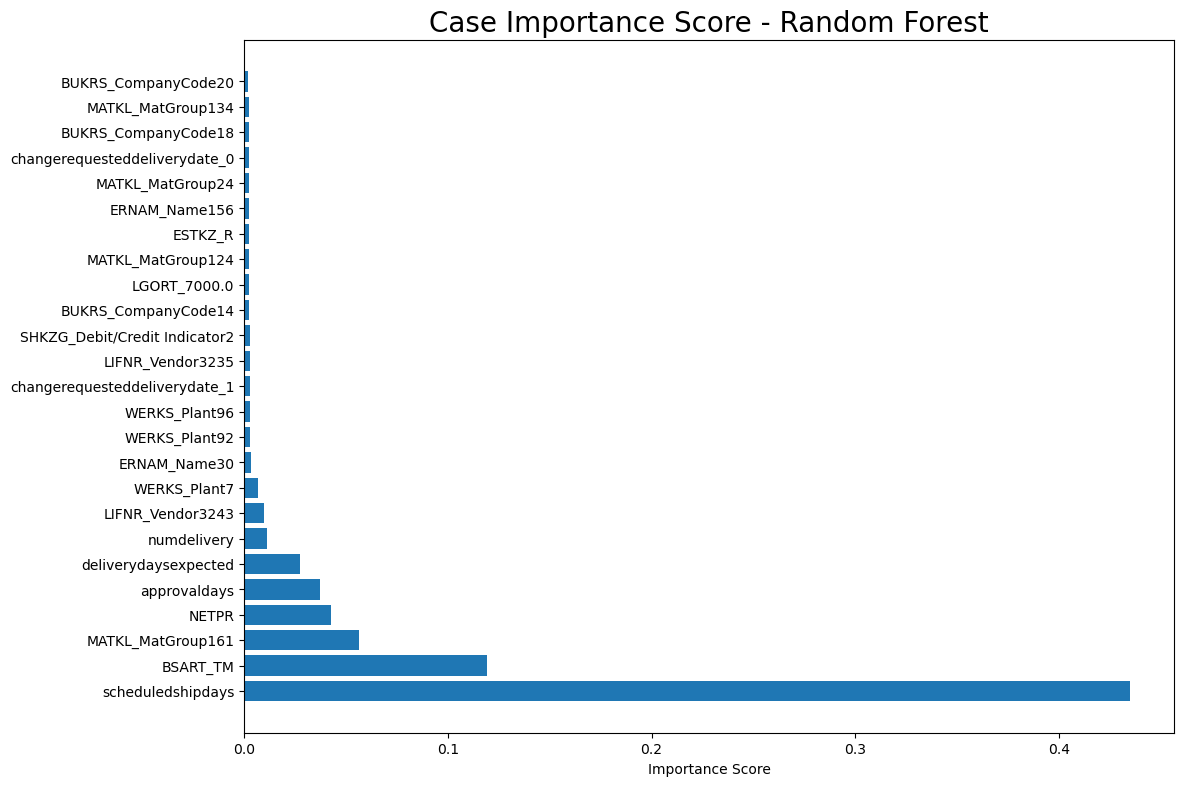

In [14]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importance = regr.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns[sorted_idx]
top_scores = feature_importance[sorted_idx]

# Plot Feature Importance
plt.figure(figsize=(12, 9))
plt.barh(features[:25], top_scores[:25], align='center')
plt.xlabel('Importance Score')
plt.title('Case Importance Score - Random Forest', fontsize=20)
plt.show()

# Neural Network (FNN)

In [74]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Transform & Clean gdata
gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')
leave_out = ['LGORT']
columns = [col for col in top_features if col not in leave_out]
gdata = gdata[columns + ['lateGR']]
gdata = gdata.dropna()

# Assuming 'target' is the name of your target variable
X = gdata[columns]
X = pd.get_dummies(X, columns=list(set(columns) & set(categorical_cols)))
y = gdata['lateGR']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Predict on the test data
y_pred = model.predict(X_test)

/tmp/ipykernel_94724/110724191.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')


Epoch 1/30
1189/1189 [==============================] - 4s 2ms/step - loss: 27.3390 - accuracy: 0.6364
Epoch 2/30
1189/1189 [==============================] - 2s 2ms/step - loss: 19.5165 - accuracy: 0.6741
Epoch 3/30
1189/1189 [==============================] - 2s 2ms/step - loss: 4.1995 - accuracy: 0.7231
Epoch 4/30
1189/1189 [==============================] - 2s 2ms/step - loss: 28.0690 - accuracy: 0.7097
Epoch 5/30
1189/1189 [==============================] - 2s 2ms/step - loss: 4.3970 - accuracy: 0.7391
Epoch 6/30
1189/1189 [==============================] - 2s 2ms/step - loss: 0.8205 - accuracy: 0.7745
Epoch 7/30
1189/1189 [==============================] - 2s 2ms/step - loss: 1.9117 - accuracy: 0.7635
Epoch 8/30
1189/1189 [==============================] - 2s 2ms/step - loss: 0.4466 - accuracy: 0.7766
Epoch 9/30
1189/1189 [==============================] - 2s 2ms/step - loss: 0.4446 - accuracy: 0.7823
Epoch 10/30
1189/1189 [==============================] - 2s 2ms/step - loss: 0.

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import shutil

shutil.rmtree('my_dir/helloworld')

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16), 
                           activation='relu', input_dim=X_train.shape[1]))
    model.add(layers.Dense(units=hp.Int('units_2', min_value=16, max_value=96, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.3, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=12,
    executions_per_trial=2,
    directory='my_dir',
    project_name='helloworld')

tuner.search_space_summary()

tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.values['units_1']} and in the second layer is {best_hps.values['units_2']}. The optimal dropout rate is {best_hps.values['dropout']}.")

Trial 12 Complete [00h 00m 17s]
val_accuracy: 0.7622377574443817

Best val_accuracy So Far: 0.7756858766078949
Total elapsed time: 00h 03m 44s
The optimal number of units in the first densely-connected layer is 64 and in the second layer is 32. The optimal dropout rate is 0.1.


In [75]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate Accuracy
accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

Mean Absolute Error: 0.2855440343327597
Root Mean Squared Error: 0.39780196425231484
R-squared: 0.36614563565094804
149/149 [==============================] - 0s 864us/step - loss: 0.5140 - accuracy: 0.7671
Accuracy: [0.5139580368995667, 0.7671434879302979]


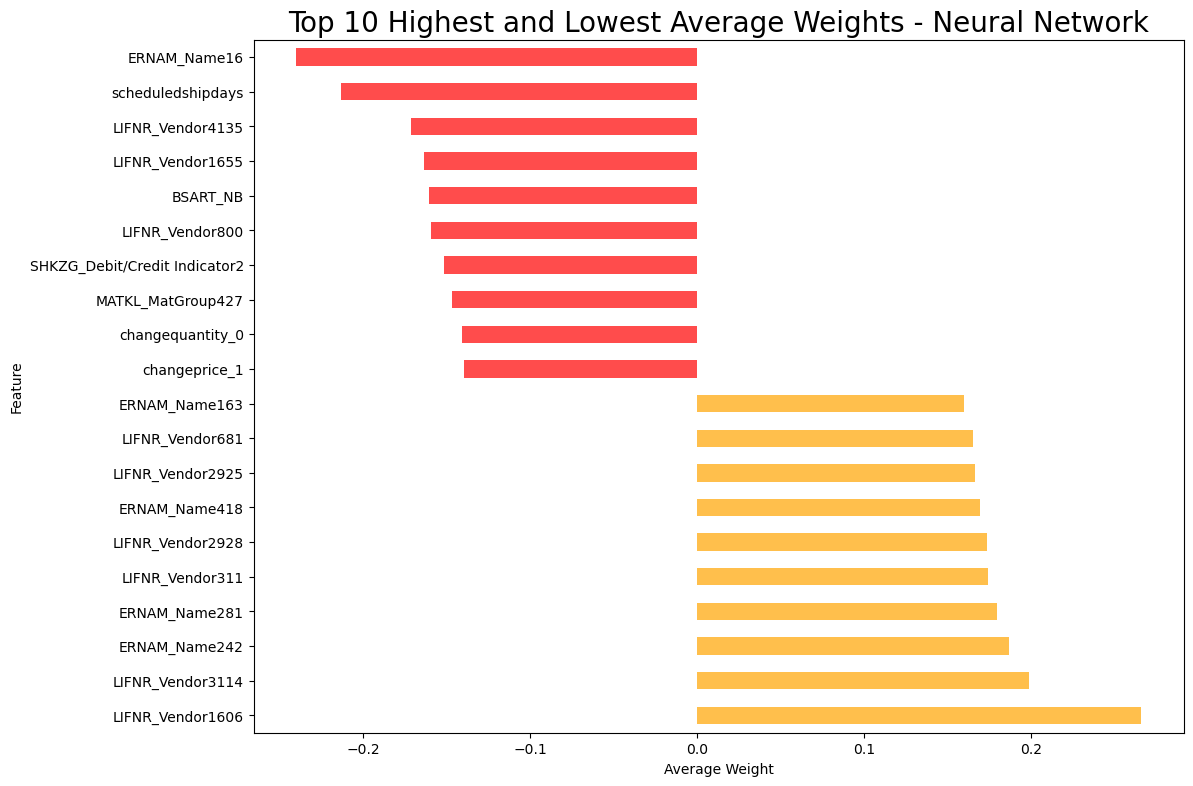

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights of the input layer
input_layer_weights = model.layers[0].get_weights()[0]

# Calculate the average weights for each feature
average_weights = np.mean(input_layer_weights, axis=1)

# Get the 10 highest and lowest average_weights
top_weights = pd.Series(average_weights, index=X.columns).sort_values(ascending=False)
top_weights = pd.concat([top_weights.head(10), top_weights.tail(10)])

# Plot the heatmap
plt.figure(figsize=(12,9))

# Color code the bars by their positive or negative values
colors = ['red' if x < 0 else 'orange' for x in top_weights]
top_weights.plot(kind='barh', color=colors, alpha=0.70)
plt.title('Top 10 Highest and Lowest Average Weights - Neural Network', fontsize=20)
plt.xlabel('Average Weight')
plt.ylabel('Feature')
plt.show()

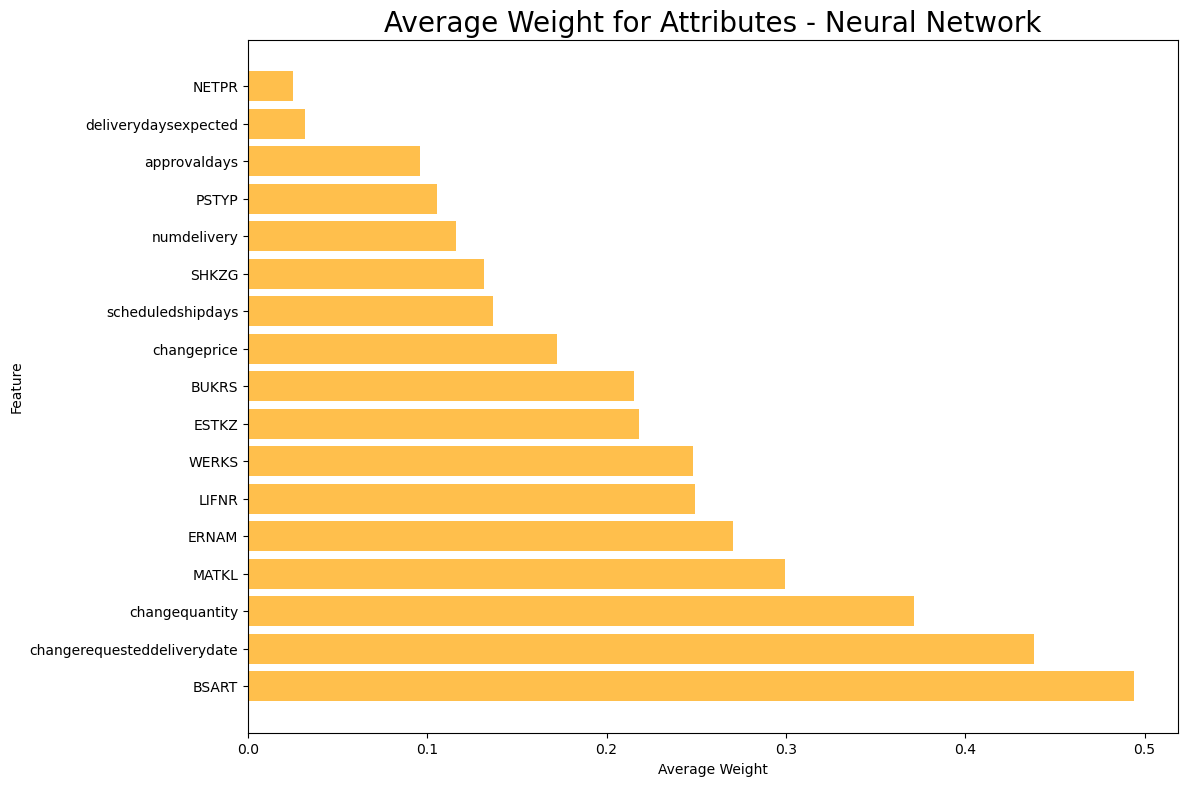

In [77]:
# Get the weights of the input layer
input_layer_weights = model.layers[0].get_weights()[0]
input_layer_weights = pd.DataFrame(input_layer_weights, index=X.columns)

# Locate rows that contain one of each of the strings in the list original_features
original_features = ['scheduledshipdays', 'BSART', 'MATKL', 'LIFNR', 'NETPR', 
                     'approvaldays', 'WERKS', 'ERNAM', 'deliverydaysexpected', 
                     'BUKRS', 'numdelivery', 'changerequesteddeliverydate', 
                     'SHKZG', 'changequantity', 'changeprice', 'ESTKZ', 'PSTYP']

# Initialize an empty dictionary to store the mean weights
grouped_weights = {}

# Assuming the numeric column is the first column
for value in original_features:
    grouped_weights[value] = input_layer_weights[input_layer_weights.index.str.contains(value)].iloc[:, 0].abs().mean()

# Sort the grouped weights
sorted_weights = dict(sorted(grouped_weights.items(), key=lambda item: item[1], reverse=True))

# Plot the grouped weights
plt.figure(figsize=(12, 9))
plt.barh(list(sorted_weights.keys()), list(sorted_weights.values()), align='center', color='orange', alpha=.7)
plt.xlabel('Average Weight')
plt.ylabel('Feature')
plt.title('Average Weight for Attributes - Neural Network', fontsize=20)
plt.show()

In [78]:
sorted_weights

{'BSART': 0.4938958,
 'changerequesteddeliverydate': 0.43854743,
 'changequantity': 0.37129185,
 'MATKL': 0.29945138,
 'ERNAM': 0.270775,
 'LIFNR': 0.24907124,
 'WERKS': 0.24842773,
 'ESTKZ': 0.21815807,
 'BUKRS': 0.2154488,
 'changeprice': 0.17222975,
 'scheduledshipdays': 0.13682239,
 'SHKZG': 0.1317927,
 'numdelivery': 0.11623821,
 'PSTYP': 0.10520524,
 'approvaldays': 0.09611859,
 'deliverydaysexpected': 0.031744882,
 'NETPR': 0.024967529}

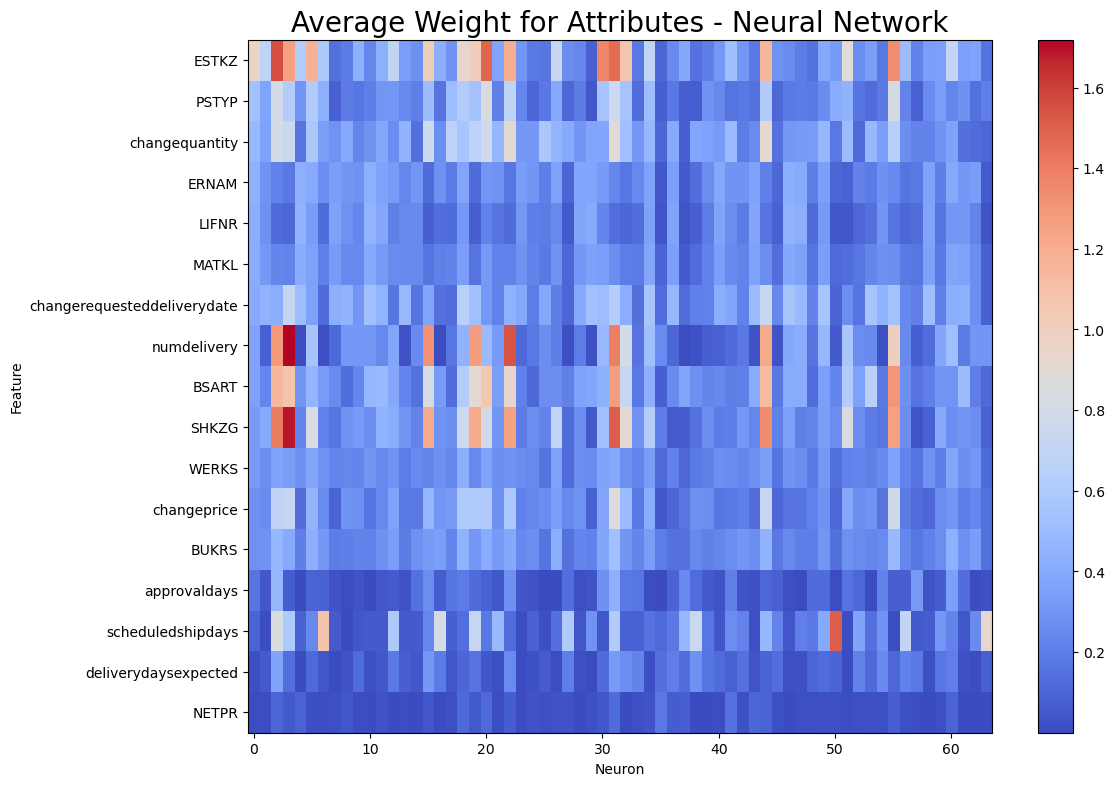

In [26]:
# Get the weights of the input layer
input_layer_weights = model.layers[0].get_weights()[0]
input_layer_weights = pd.DataFrame(input_layer_weights, index=X.columns)

# Locate rows that contain one of each of the strings in the list original_features
original_features = ['scheduledshipdays', 'BSART', 'MATKL', 'LIFNR', 'NETPR', 
                     'approvaldays', 'WERKS', 'ERNAM', 'deliverydaysexpected', 
                     'BUKRS', 'numdelivery', 'changerequesteddeliverydate', 
                     'SHKZG', 'changequantity', 'changeprice', 'ESTKZ', 'PSTYP']

# Initialize an empty DataFrame to store the mean weights
grouped_weights = pd.DataFrame()

# Iterate over original_features and columns
for value in original_features:
    for col in input_layer_weights.columns:
        # Create a mask where each value is True if the index contains the current feature and False otherwise
        mask = input_layer_weights.index.str.contains(value)
        
        # Calculate the mean of each group and append it to grouped_weights
        grouped_weights.loc[value, col] = input_layer_weights.loc[mask, col].abs().mean()

# Sort the grouped weights
sorted_weights = grouped_weights.sort_values(by=0, axis=0, ascending=False)

# Plot the heatmap
plt.figure(figsize=(12, 9))
plt.imshow(sorted_weights, aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.yticks(range(sorted_weights.shape[0]), sorted_weights.index)
plt.xticks()
plt.xlabel('Neuron')
plt.ylabel('Feature')
plt.title('Average Weight for Attributes - Neural Network', fontsize=20)
plt.show()

# SVM

In [65]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Transform & Clean gdata
gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')
leave_out = ['NETPR', 'LGORT', 'approvaldays', 'SHKZG', 'deliverydaysexpected']
columns = [col for col in top_features if col not in leave_out]
gdata = gdata[columns + ['lateGR']]
gdata = gdata.dropna()
gdata = gdata.sample(frac=1, random_state=42)

# Assuming 'target' is the name of your target variable
X = gdata[columns]
X = pd.get_dummies(X, columns=list(set(columns) & set(categorical_cols)))
y = gdata['lateGR']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Save the SVM model
import joblib
joblib.dump(clf, 'svm_model.pkl')

/tmp/ipykernel_94724/1107775776.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')


['svm_model.pkl']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import joblib

# Load the model
clf = joblib.load('svm_model.pkl')

# Load the specifications
gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')
leave_out = ['NETPR', 'LGORT', 'approvaldays', 'SHKZG', 'deliverydaysexpected']
columns = [col for col in top_features if col not in leave_out]
gdata = gdata[columns + ['lateGR']]
gdata = gdata.dropna()
gdata = gdata.sample(frac=1, random_state=42)

# Assuming 'target' is the name of your target variable
X = gdata[columns]
X = pd.get_dummies(X, columns=list(set(columns) & set(categorical_cols)))
y = gdata['lateGR']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = clf.predict(X_test)

/tmp/ipykernel_94724/693463225.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')


In [80]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Accuracy: 0.7776392352452203
Mean Absolute Error: 0.22236076475477973
Root Mean Squared Error: 0.4715514444414095
R-squared: 0.1101412826392485


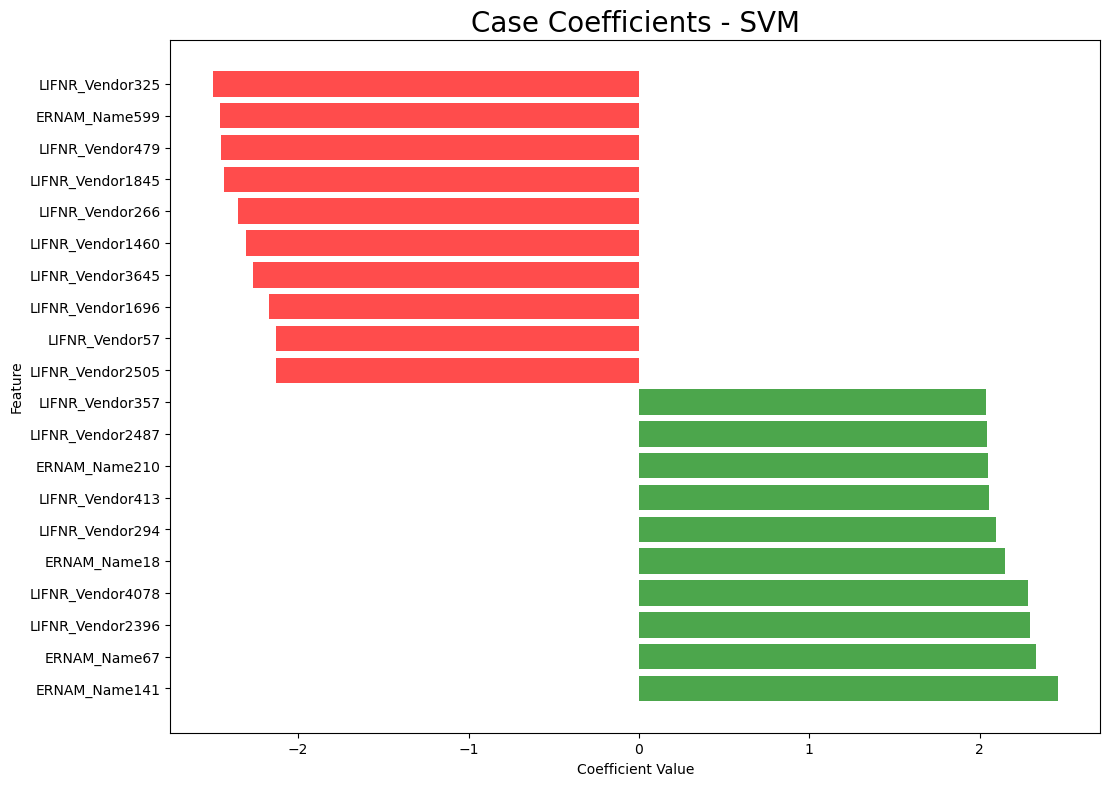

In [81]:
# Get the coefficients (weights) assigned to each feature
coefficients = clf.coef_

# Reverse the one-hot encoding
feature_names = pd.Series(X.columns)

# Create a DataFrame to store the coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients.flatten()})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the highest and lowest coefficients
plt.figure(figsize=(12, 9))
plt.barh(coefficients_df['Feature'][:10], coefficients_df['Coefficient'][:10], color='green', alpha=0.7)
plt.barh(coefficients_df['Feature'][-10:], coefficients_df['Coefficient'][-10:], color='red', alpha=0.7)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Case Coefficients - SVM', fontsize=20)
plt.show()

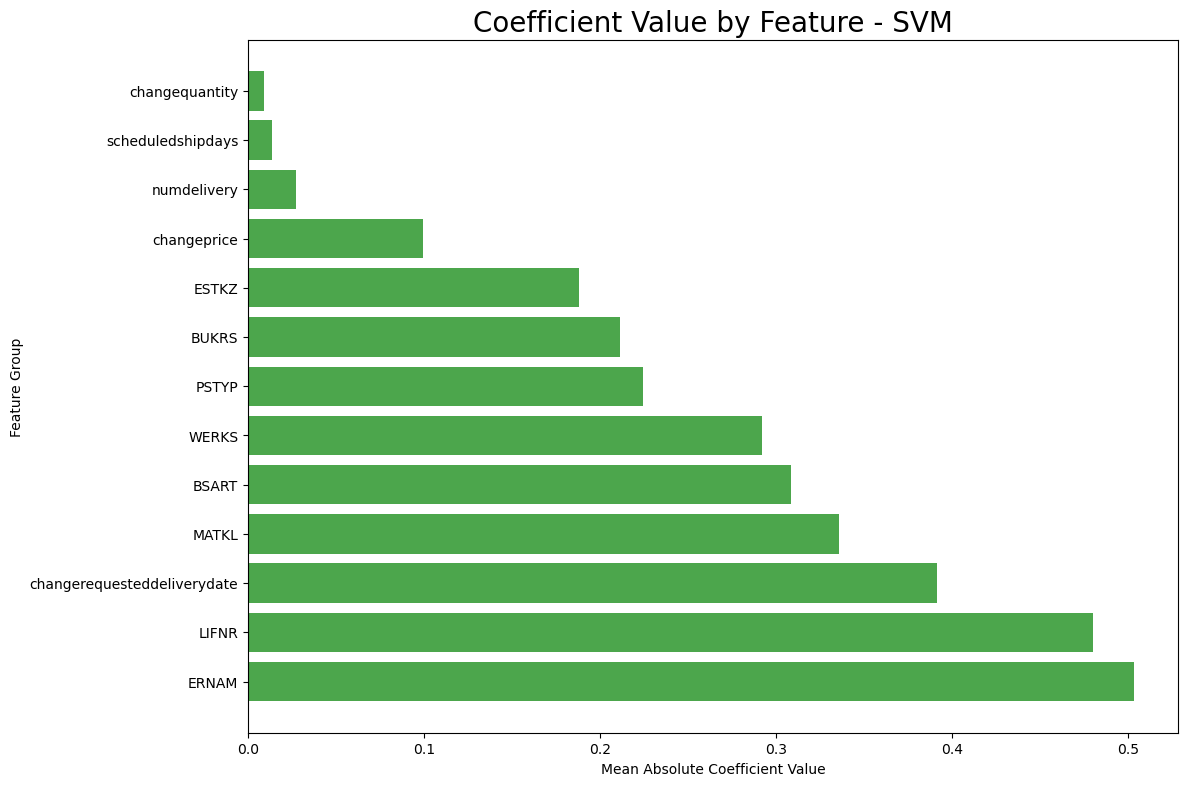

In [82]:
# Group the coefficients by the top_features
grouped_coefficients = {}

# Assuming 'Coefficient' is the numeric column
for value in columns:
    grouped_coefficients[value] = coefficients_df[coefficients_df['Feature'].str.contains(value)]['Coefficient'].abs().mean()

# Sort the grouped coefficients
sorted_coefficients = dict(sorted(grouped_coefficients.items(), key=lambda item: item[1], reverse=True))

# Plot the grouped coefficients
plt.figure(figsize=(12, 9))
plt.barh(list(sorted_coefficients.keys()), list(sorted_coefficients.values()), align='center', color='green', alpha=0.70)
plt.xlabel('Mean Absolute Coefficient Value')
plt.ylabel('Feature Group')
plt.title('Coefficient Value by Feature - SVM', fontsize=20)
plt.show()

In [83]:
sorted_coefficients

{'ERNAM': 0.503312966995116,
 'LIFNR': 0.4801004854423811,
 'changerequesteddeliverydate': 0.39157136375328416,
 'MATKL': 0.3360607069821193,
 'BSART': 0.3086383489420957,
 'WERKS': 0.2923108606677151,
 'PSTYP': 0.22443370196991896,
 'BUKRS': 0.2116702388061561,
 'ESTKZ': 0.18836964803633613,
 'changeprice': 0.0997004893773733,
 'numdelivery': 0.027156226373254988,
 'scheduledshipdays': 0.013873187238315765,
 'changequantity': 0.009143838773780416}

# Model Comparison

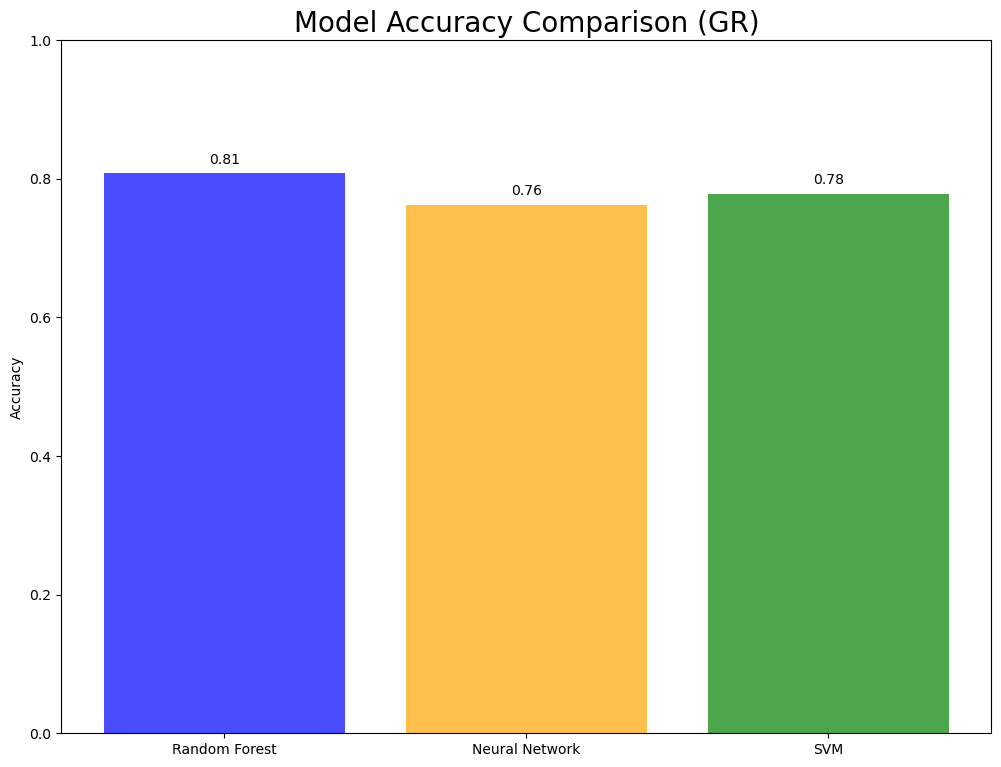

In [72]:
# Define accuracies of models
accuracies = {'Random Forest': 0.8078942689860206, 
              'Neural Network': 0.7623054385185242, 
              'SVM': 0.7776392352452203}

# Plot the accuracies
plt.figure(figsize=(12, 9))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green'], alpha=0.70)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (GR)', fontsize=20)
plt.ylim(0, 1)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
plt.show()

In [96]:
qwer = {'scheduledshipdays': 0.43486092454107705,
 'BSART': 0.1229139641562667,
 'MATKL': 0.11301608930293988,
 'LIFNR': 0.08695607151157203,
 'NETPR': 0.04232055911087528,
 'approvaldays': 0.03733767055782647,
 'WERKS': 0.035513669397037484,
 'ERNAM': 0.029815188613053316,
 'deliverydaysexpected': 0.027441683217166293,
 'BUKRS': 0.01843812752361523,
 'LGORT': 0.012929472191889493,
 'numdelivery': 0.011317336335414667,
 'changerequesteddeliverydate': 0.009047508344325347,
 'SHKZG': 0.004604798617497145,
 'changequantity': 0.0035983502741017246,
 'ESTKZ': 0.003587168701206506,
 'PSTYP': 0.003307169885267279,
 'changeprice': 0.002994247718868114,}

tyu = {'BSART': 0.4938958,
 'changerequesteddeliverydate': 0.43854743,
 'changequantity': 0.37129185,
 'MATKL': 0.29945138,
 'ERNAM': 0.270775,
 'LIFNR': 0.24907124,
 'WERKS': 0.24842773,
 'ESTKZ': 0.21815807,
 'BUKRS': 0.2154488,
 'changeprice': 0.17222975,
 'scheduledshipdays': 0.13682239,
 'SHKZG': 0.1317927,
 'numdelivery': 0.11623821,
 'PSTYP': 0.10520524,
 'approvaldays': 0.09611859,
 'deliverydaysexpected': 0.031744882,
 'NETPR': 0.024967529}

asd = {'ERNAM': 0.503312966995116,
 'LIFNR': 0.4801004854423811,
 'changerequesteddeliverydate': 0.39157136375328416,
 'MATKL': 0.3360607069821193,
 'BSART': 0.3086383489420957,
 'WERKS': 0.2923108606677151,
 'PSTYP': 0.22443370196991896,
 'BUKRS': 0.2116702388061561,
 'ESTKZ': 0.18836964803633613,
 'changeprice': 0.0997004893773733,
 'numdelivery': 0.027156226373254988,
 'scheduledshipdays': 0.013873187238315765,
 'changequantity': 0.009143838773780416}

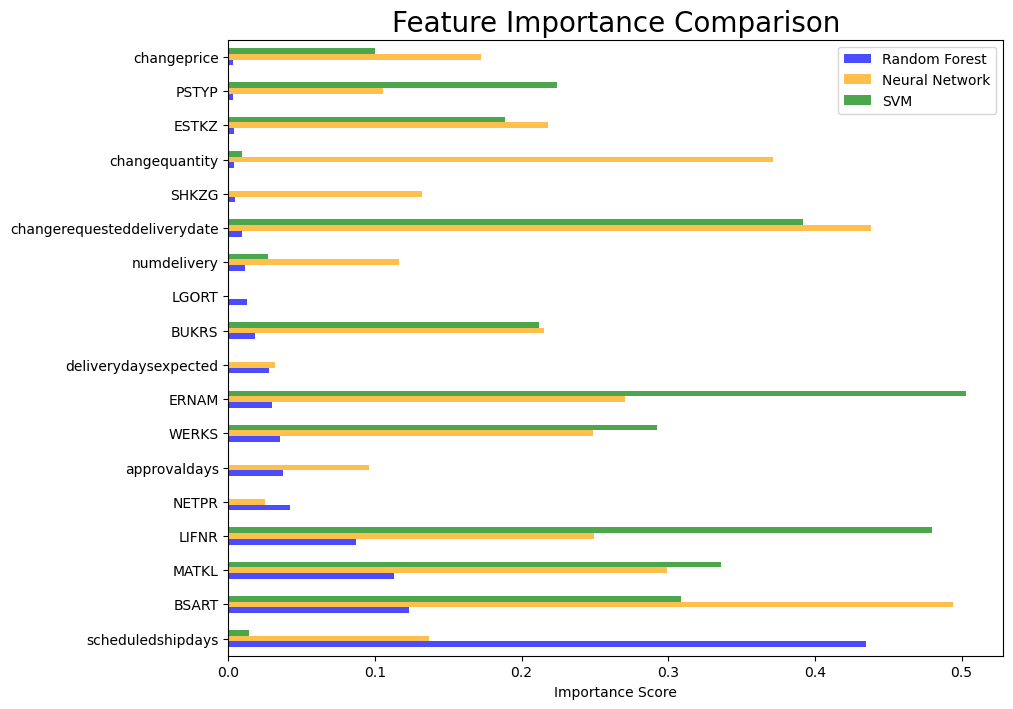

In [113]:
# Create a DataFrame to store the importance scores
importance_df = pd.DataFrame({'Random Forest': qwer, 'Neural Network': tyu, 'SVM': asd})

# Create a figure and axes with the desired size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the importance scores on the axes
importance_df.plot(kind='barh', alpha=0.7, color=['blue', 'orange', 'green'], ax=ax)
plt.xlabel('Importance Score')
plt.title('Feature Importance Comparison', fontsize=20)
plt.show()